<span style="font-size: 10px">Namah Siddham

<span style="font-size: 40px; color:#DF999A;">Import Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR,LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump,load
import plotly.graph_objects as go
import plotly.offline as pyo
import dash
from dash import html,dcc,Input,Output,State

<span style="font-size: 40px; color:#DF999A;">Project Description:

Concrete is the most important material in Civil Engineering. This is the most common material used in construction of building and infrastructure.
The strength and consistency of concrete determines the integrity of structure being build. Concrete is prepared by mixing various ingredients such as cement, water, fly ash, slag etc. The quantities and proportions are very important to achieve desired strength of the concrete.

This project focuses on developing a model to predict compressive strength of the concrete based on different proportion of ingredients and building a web app where user can enter different quantities of materials to predict compressive strength of the concrete.


<span style="font-size: 40px; color:#DF999A;">Use Case and Advantages:

<span style="font-size: 20px; color:#15BD9A;">Optimizing Material Use:

It could help in optimizing the use of materials. By knowing exactly how different quantities of ingredients affect the strength of the concrete, one can adjust these quantities to get the desired strength. This could lead to cost savings and more efficient use of materials.

<span style="font-size: 20px; color:#15BD9A;">Improving Quality and Safety:

It could lead to higher quality and safer construction projects. With the ability to predict concrete strength, engineers could ensure that the buildings and structures they design will be strong and durable.

<span style="font-size: 20px; color:#15BD9A;">Saving Time:

It could lead to faster decision making. Rather than having to wait for physical concrete samples to cure and then test them, a ML model could predict strength based on ingredient quantities, thereby saving a lot of time.

<span style="font-size: 20px; color:#15BD9A;">Reducing Carbon Footprint:

Concrete production is responsible for a significant amount of carbon emissions. If we can optimize the mix to achieve the same strength with less cement (the ingredient responsible for most of the emissions), it would help in reducing the carbon footprint.

<span style="font-size: 20px; color:#15BD9A;">Predictive Maintenance and Durability:

The model could be used to predict the longevity and maintenance requirements of a building or structure based on the quality and strength of the concrete used. This could be invaluable for infrastructure planning and management.

<span style="font-size: 20px; color:#15BD9A;">Automation:

As ML models can be integrated into other systems, it could contribute to more automated processes in the construction industry. For example, a fully automated system could adjust concrete ingredient quantities on-the-fly to ensure optimal strength based on environmental conditions, specific use cases, and more.

<span style="font-size: 20px; color:#15BD9A;">Research and Development:

The model could also be used in research and development to discover new concrete mixes and compositions. By adjusting the input parameters (quantities of ingredients), researchers can predict the output (strength) and potentially discover more efficient or effective mixes.

id : Id of each cement mixture,
cement : The amount of cement (Kg) in a m3 mixture,
slag : The amount of blast furnace slag (Kg) in a m3 mixture,
flyash : The amount of fly ash (Kg) in a m3 mixture,
water : The amount of water (Kg) in a m3 mixture,
super_plast: The amount of Superplasticizer (Kg) in a m3 mixture,
coarse_agg : The amount of Coarse Aggreagate (Kg) in a m3 mixture,
fine_agg : The amount of Fine Aggregate (Kg) in a m3 mixture,
age : the number of resting days before the compressive strength measurement,
strength : Concrete compressive strength measurement in MPa unit.

<span style="font-size: 40px; color:#DF999A;"> Read the Data

<font size="5" color="rgb(200,200,0)">The source of the data is UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [18]:
concrete = pd.read_csv('Concrete Data.csv') # importing the data from a csv file.
concrete.head()  # checking first five rows of the data.

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<span style="font-size: 40px; color:#DF999A;">Data Preprocessing and Exploration

In [19]:
# Renaming Column Names
concrete.columns = np.array(['cement','slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate','age','concrete_comp_strength'])
concrete.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_comp_strength'],
      dtype='object')

In [20]:
# Checking for null values in the dataset
concrete.isnull().sum()

cement                    0
slag                      0
fly_ash                   0
water                     0
superplasticizer          0
coarse_aggregate          0
fine_aggregate            0
age                       0
concrete_comp_strength    0
dtype: int64

<font size="5" color="rgb(200,200,0)">No null values present

In [21]:
# Checking data types of columns
concrete.dtypes

cement                    float64
slag                      float64
fly_ash                   float64
water                     float64
superplasticizer          float64
coarse_aggregate          float64
fine_aggregate            float64
age                         int64
concrete_comp_strength    float64
dtype: object

<font size="5" color="rgb(200,200,0)">All data types are correct.

In [22]:
# Descriptive Statistics of the data
concrete.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_comp_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


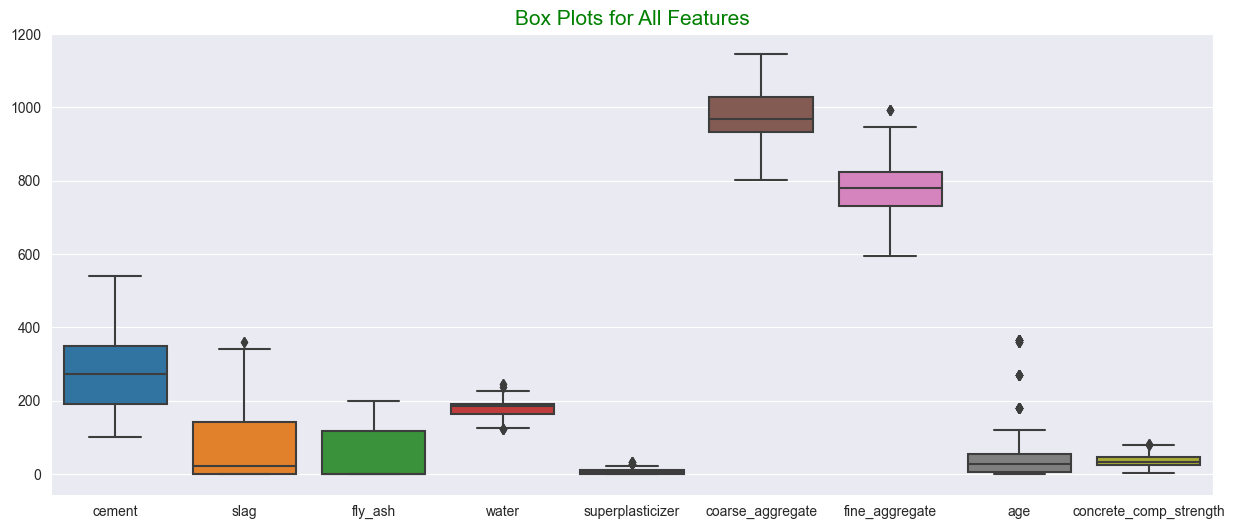

In [23]:
# Checking for Outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=concrete)
plt.title('Box Plots for All Features',color='g',size=15);

In [24]:
# Removing Outliers from the Data
columns = ['slag','water','superplasticizer','fine_aggregate','concrete_comp_strength']  # not including the age column
for col in columns:
    Q1 = concrete[col].quantile(.25)
    Q3 = concrete[col].quantile(.75)
    IQR = Q3-Q1
    # Only keeping the rows in the dataframe that do not have outliers in the columns
    concrete = concrete[~((concrete[col] < (Q1-1.5*IQR))  | (concrete[col] > (Q3+1.5*IQR)))]

concrete

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_comp_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<font size="5" color="rgb(200,200,0)">28 outliers rows have been removed.

In [174]:
concrete.to_csv('concrete data.csv')

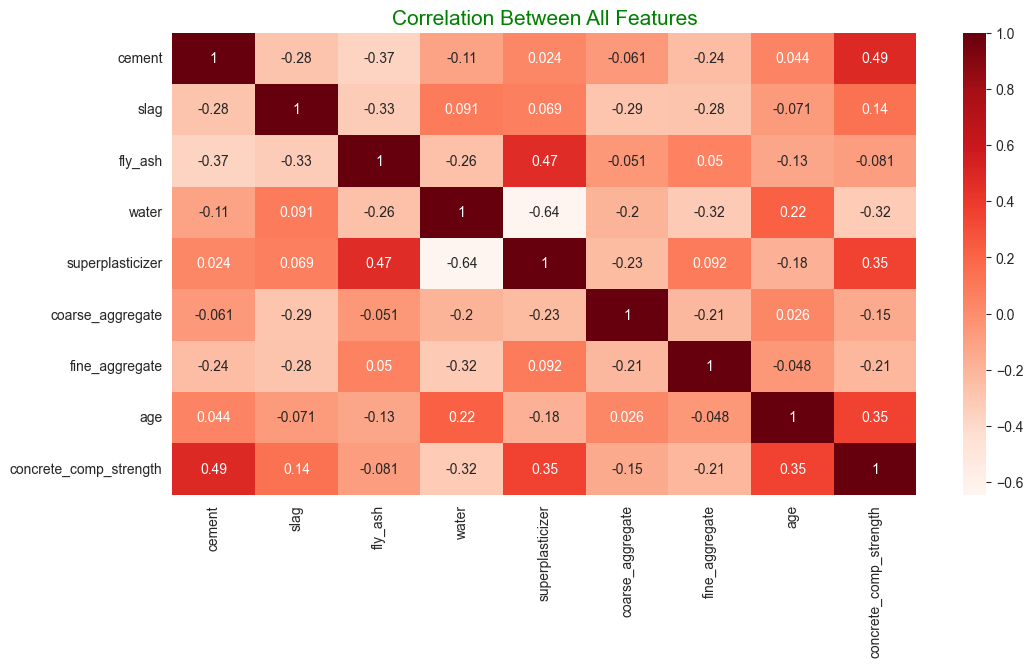

In [37]:
# Checking Correlation Between Features
corr_data = concrete.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=corr_data,cmap='Reds',annot=True)
plt.title('Correlation Between All Features',color='g',size=15);

<font size="5" color="rgb(200,200,0)">Cement has the highest positive correlation with compressive strength and water has most negative correlation with compressive strength.
This makes sense as the compressive strength of the concrete is highly affected by cement/water ratio.

<font size="5" color="rgb(200,200,0)">Superplasticizer has positive correlation (.35) with strength and negative correlation (-.64) with water which also makes sense. Superplasticizer is also known as water reducer.

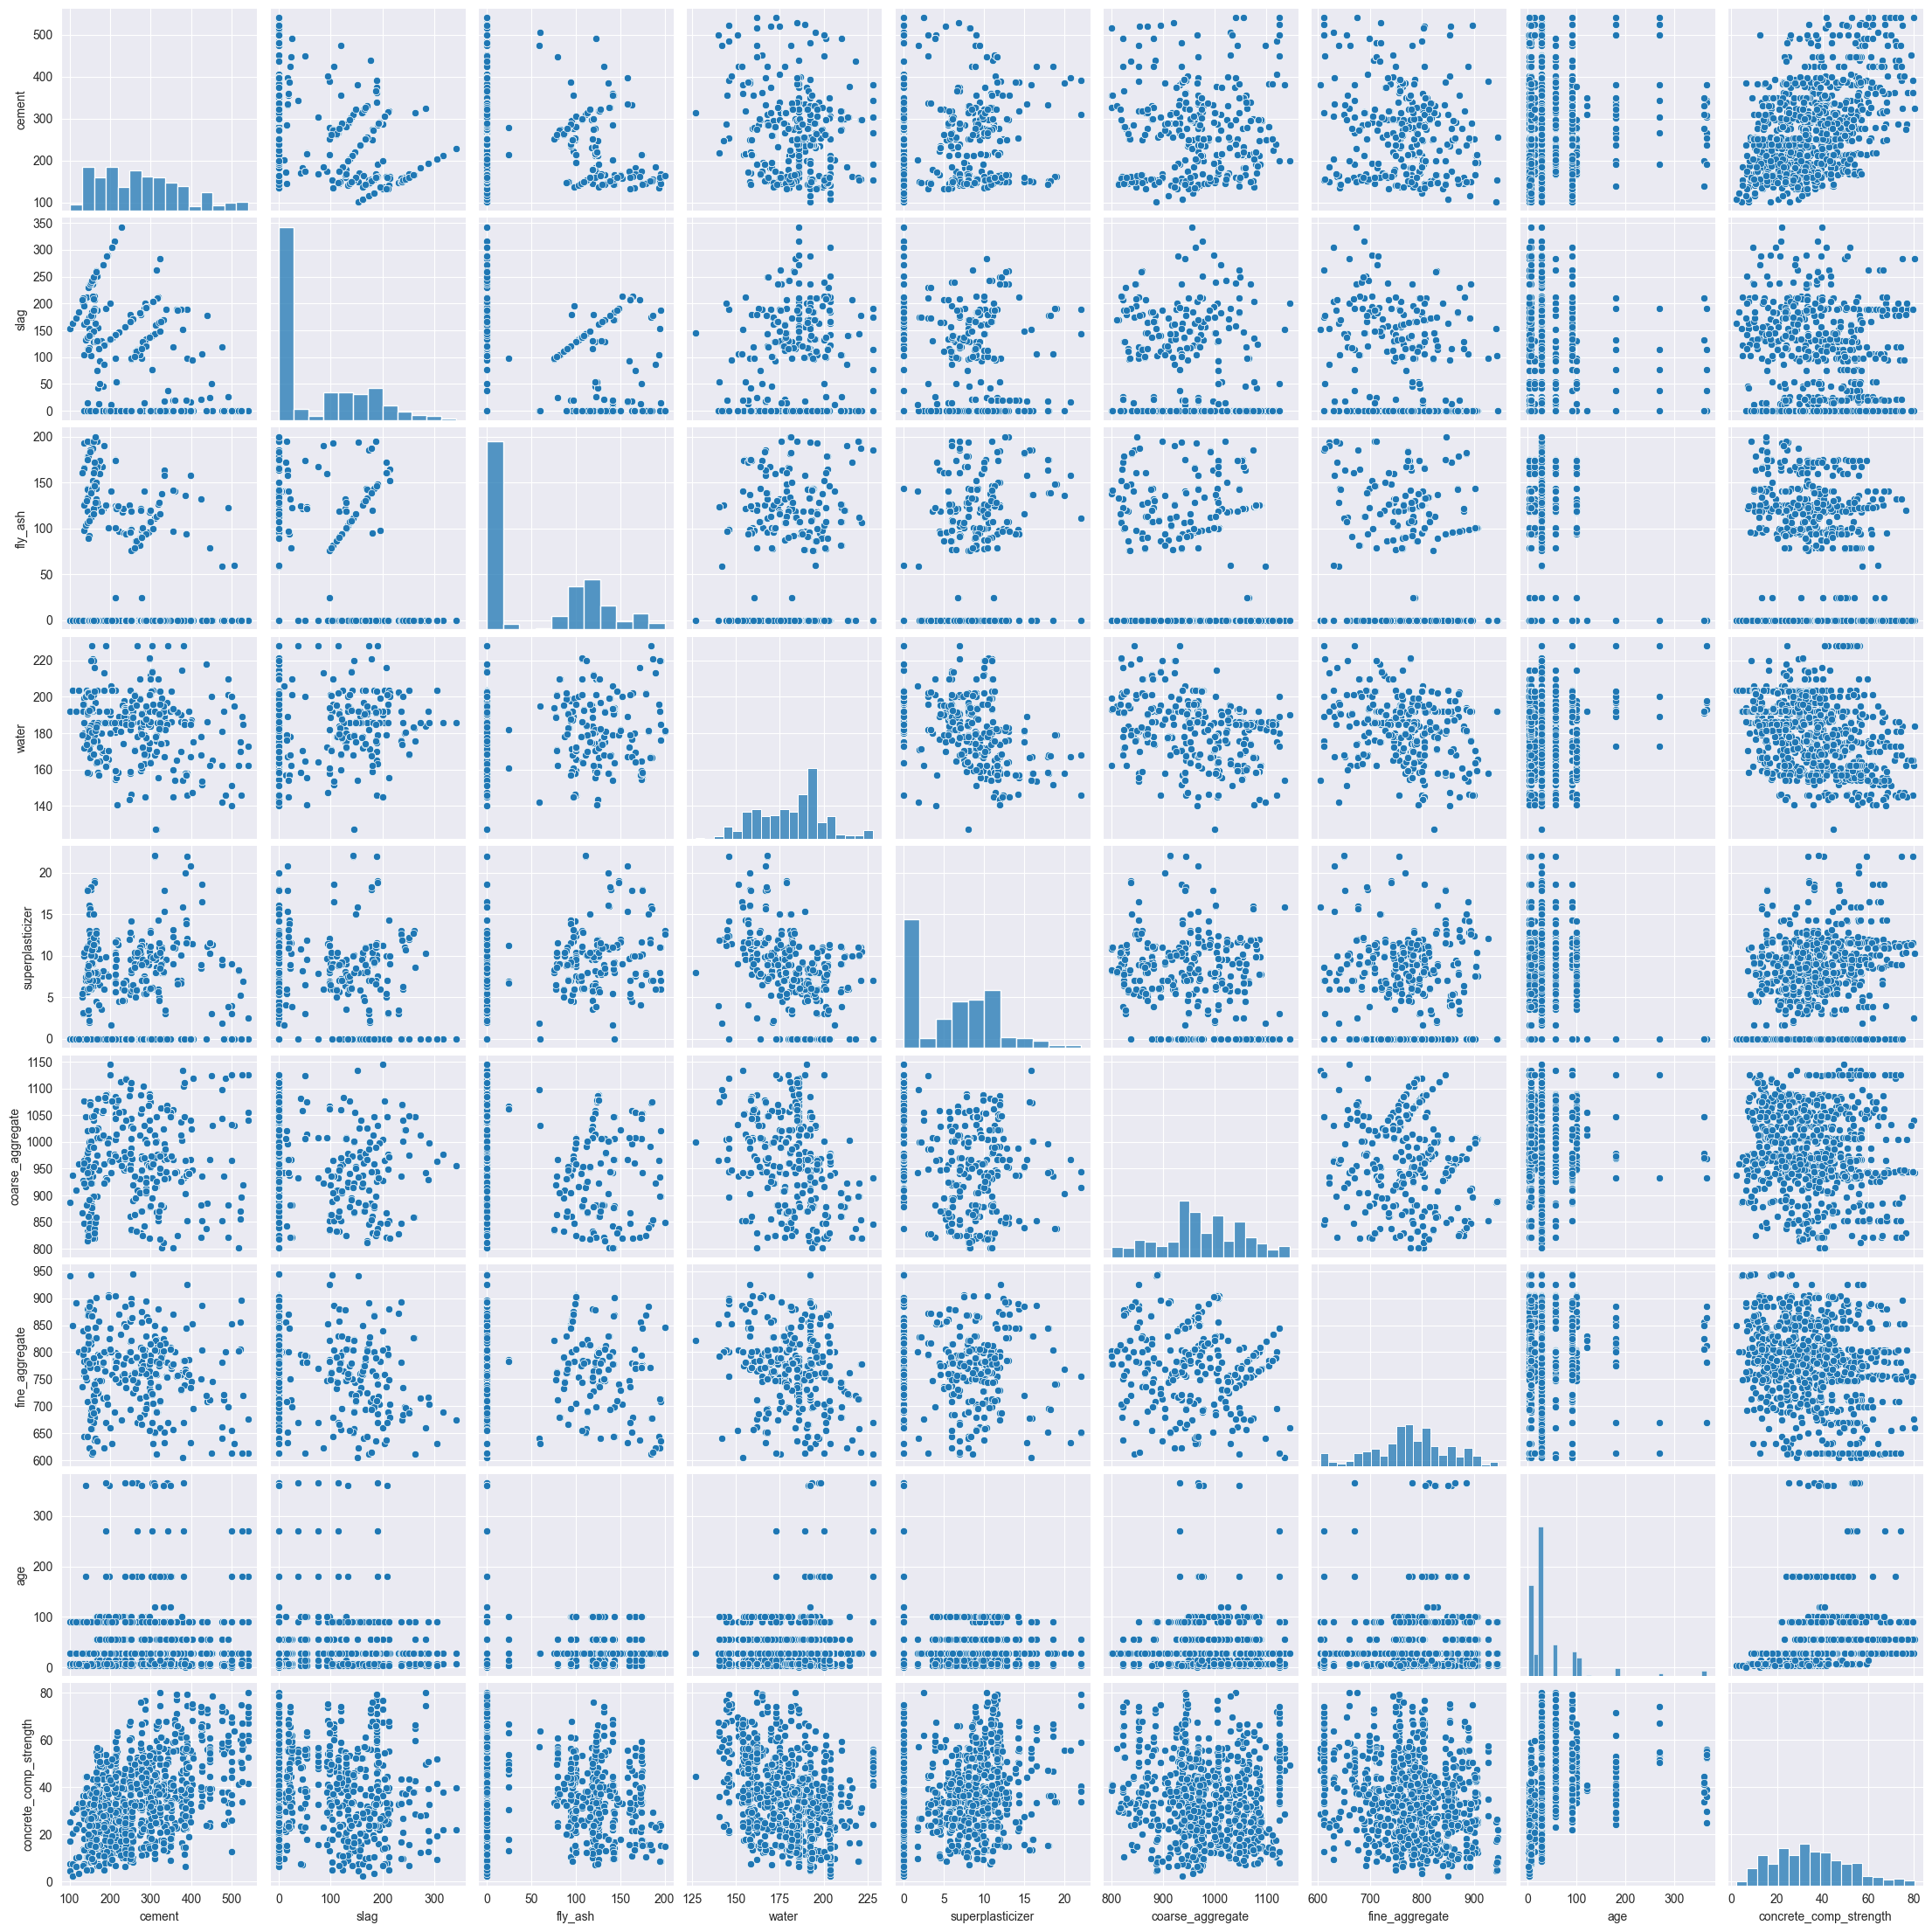

In [38]:
sns.pairplot(data=concrete,kind='scatter')

<font size="5" color="rgb(200,200,0)">Almost all relations are more non-linear except cement and concrete strength have somewhat linear relationship. A linear regression model might not be suitable for this dataset.

<span style="font-size: 40px; color:#DF999A;">Modelling

In [41]:
# Separating Features and Target Label
X = concrete.drop('concrete_comp_strength',axis=1)  # Features
y = concrete['concrete_comp_strength']  # Target Column

In [42]:
X.shape

(972, 8)

In [43]:
y.shape

(972,)

In [44]:
# Splitting the Data into Training and Test Data using Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=108)

<font size="5" color="rgb(200,200,0)">The features seem to be on different scales. For example, the 'cement' feature is in the hundreds, while 'superplasticizer' is in the tens. The 'age' feature can be much larger, especially for data points where the age is in the hundreds of days. Therefore, scaling the data to bring them on same scale before training the model.

In [45]:
# Scaling the Data
scaler = StandardScaler()  # creating instance of StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # fitting the scaler to only training data and then transforming the data.
X_test_scaled = scaler.transform(X_test)  # transforming the test data

In [46]:
X_train_scaled.shape

(777, 8)

In [47]:
X_test_scaled.shape

(195, 8)

# Model Selection

<font size="5" color="rgb(200,200,0)">As explored earlier, the dataset is not big and the relation between features are non-linear. In such case, we can try Support Vector Machine Regression Model and Random Forest Regression Model.

# Model 1 - Support Vector Machine

<font size="5" color="rgb(0,200,0)">Performing Initial Model Validation before performing grid search or hyperparameter tuning for the following reasons:

<font size="5" color="rgb(200,200,0)">Understand the Model Behavior: Before diving into optimizing the model, it is a good idea to get a sense of how model performs with the default parameters. This will give an idea of the model's performance, which serves as a baseline for comparing the results of tuned models.

<font size="5" color="rgb(200,200,0)">Efficiency: Grid search can be computationally expensive, especially with a large number of hyperparameters and large datasets. If a model performs very poorly in the initial evaluation, it may not be worth the time and computational resources to perform a grid search.

<font size="5" color="rgb(0,200,200)">There are 3 variants of SVR: SVR, NuSVR and LinearSVR. Since, Linear SVR is effective when relationships are linear which is not in this case. For this analysis using SVR which can handle non-linear complex relationships.

# Defining and Fitting the Base Model

In [48]:
base_model = SVR()  # Using the default parameters
base_model.fit(X_train_scaled,y_train)  # Fitting the model to the training data
base_predictions = base_model.predict(X_test_scaled) # Predicting on test data

# Evaluating the Base Model

In [50]:
mae = mean_absolute_error(y_true=y_test,y_pred=base_predictions)
mse = mean_squared_error(y_true=y_test,y_pred=base_predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 7.232984349304896
Mean Squared Error: 91.3958426995115
Root Mean Squared Error: 9.560117295279985


# Grid Search in Attempt for Better Model

In [52]:
# Setting up parameter grid
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [53]:
# Defining the Model
svr = SVR()
grid_model = GridSearchCV(svr,param_grid=param_grid)

# Fitting the model to the training data
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [54]:
# Finding the best parameters from the grid search
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [55]:
# Calculating the predictions
grid_predictions = grid_model.predict(X_test_scaled)  # Predicting on test data

In [56]:
# Evaluating the Grid Model
mae = mean_absolute_error(y_true=y_test,y_pred=grid_predictions)
mse = mean_squared_error(y_true=y_test,y_pred=grid_predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 7.234303293598281
Mean Squared Error: 91.37741819550425
Root Mean Squared Error: 9.55915363384773


<font size="5" color="rgb(200,200,0)">As it can be observed that there is not much improvement in the results. Since, there was lot of noise in the data, we can try to increase the value of C parameter as small C value means more regularization. The best value of C =1 happens to be at the edge of the parameter grid. This result suggests that we might want to explore higher values of 'C', because the optimal value could potentially be higher than 1.

# Training the Model with Different Set of Hyperparameters

In [57]:
# Setting up new parameter grid with higher C values
param_grid_new = {'C':[10,50,100,500,1000],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [58]:
# Defining the Model
svr_model = SVR()
grid_model_new = GridSearchCV(svr_model,param_grid=param_grid_new)

# Fitting the model to the training data
grid_model_new.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10, 50, 100, 500, 1000], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [61]:
# Finding Best Parameters
grid_model_new.best_params_

{'C': 500, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [69]:
grid_model_new.best_estimator_

SVR(C=500, degree=2, epsilon=2, gamma='auto')

In [59]:
# Calculating the predictions
grid_predictions_new = grid_model_new.predict(X_test_scaled)  # Predicting on test data

In [60]:
# Evaluating the New Grid Model
mae = mean_absolute_error(y_true=y_test,y_pred=grid_predictions_new)
mse = mean_squared_error(y_true=y_test,y_pred=grid_predictions_new)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 3.960097737874447
Mean Squared Error: 28.185322686288284
Root Mean Squared Error: 5.308985090042002


<font size="5" color="rgb(200,200,0)">This is good improvement in the model compared to the base model. However, we need to check if the model could be overfitting. We can evaluate the model of the training data and compare it with the test data.

# Comparing Errors on Training and Testing Data for Possibility of Overfitting

In [62]:
train_predictions = grid_model_new.predict(X_train_scaled)
train_mae = mean_absolute_error(y_true=y_train,y_pred=train_predictions)
train_mse = mean_squared_error(y_true=y_train,y_pred=train_predictions)
train_rmse = np.sqrt(train_mse)

print(f'Mean Absolute Error: {train_mae}')
print(f'Mean Squared Error: {train_mse}')
print(f'Root Mean Squared Error: {train_rmse}')

Mean Absolute Error: 2.393695202442342
Mean Squared Error: 10.95733457932188
Root Mean Squared Error: 3.310186487091306


<font size="5" color="rgb(200,200,0)">It indicates that model might be slightly overfitting as the difference isn't drastic between training error and test error. The values of compressive strength in the dataset varies from 2.23 to 83. So the average error of 5.3 does not seem to be too good or too bad. Weather this error is acceptable or not will depend on the context. The subject expertise can provide more guidance on this and the model can be improved accordingly if required.

<font size="5" color="rgb(0,200,200)">In the above model,I inadvertently used the test set more than once, which I realized could lead to data leakage and potentially an overly optimistic estimate of my model's performance. Redoing the model using new train test split with new random seed and selecting broader range of C Values.

# Model 1A - Support Vector Machine Model

In [77]:
# Split the Data with a new Random State
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1008)

In [78]:
# Scaling the Data Using Standard Scaler
scaler = StandardScaler()  # creating instance of StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # fitting the scaler to only training data and then transforming the data.
X_test_scaled = scaler.transform(X_test)  # transforming test data

In [79]:
# Setting up parameter grid
param_grid = {'C':[10,50,100,250,500,750,1000],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

# Defining the Model
svr = SVR()
svr_grid = GridSearchCV(svr,param_grid=param_grid_new,cv=5)

# Fitting the model to the training data
svr_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 50, 100, 500, 1000], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [80]:
# Finding Best Estimator
svr_best_model = svr_grid.best_estimator_
svr_best_model

SVR(C=100, degree=2, epsilon=2, gamma='auto')

In [81]:
# Calculating Predictions
svr_grid_predictions = svr_best_model.predict(X_test_scaled)

In [82]:
# Calculating Error Metrics
svr_mae = mean_absolute_error(y_true=y_test,y_pred=svr_grid_predictions)
svr_mse = mean_squared_error(y_true=y_test,y_pred=svr_grid_predictions)
svr_rmse = np.sqrt(svr_mse)

print(f'Mean Absolute Error: {svr_mae}')
print(f'Mean Squared Error: {svr_mse}')
print(f'Root Mean Squared Error: {svr_rmse}')

Mean Absolute Error: 3.872054801231161
Mean Squared Error: 28.24694371527312
Root Mean Squared Error: 5.3147853875084285


<font size="5" color="rgb(200,200,0)">The root mean squared error is 5.31 vs 9.56 in base model. This shows improvement in performance of the model.

# Model 2: Random Forest Regressor (Base Model with Default Hyperparameters)

In [85]:
# Creating base model for Random Forest Regressor
rf_base_model = RandomForestRegressor()  # Creating Instance of Random Forest Regressor
rf_base_model.fit(X_train_scaled,y_train)  # Fitting the model to the training data
rf_base_model_predictions = rf_base_model.predict(X_test_scaled)  # Calculating predictions

In [86]:
# Evaluating Model
# Calculating Error Metrics
rf_base_mae = mean_absolute_error(y_true=y_test,y_pred=rf_base_model_predictions)
rf_base_mse = mean_squared_error(y_true=y_test,y_pred=rf_base_model_predictions)
rf_base_rmse = np.sqrt(svr_mse)

print(f'Mean Absolute Error: {rf_base_mae}')
print(f'Mean Squared Error: {rf_base_mse}')
print(f'Root Mean Squared Error: {rf_base_rmse}')

Mean Absolute Error: 3.3110456064306053
Mean Squared Error: 21.39014828910714
Root Mean Squared Error: 5.3147853875084285


<font size="5" color="rgb(200,200,0)">The random forest base model is performing better than svr base model.

# Model 2A: RandomForest Regressor with Grid SearchCV

In [87]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 0)

# Fit the grid search to the data
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]})

In [88]:
# Print the best parameters
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [90]:
# Print the Best Model
rf_best_model = rf_grid.best_estimator_
rf_best_model

RandomForestRegressor()

In [91]:
rf_y_pred = rf_best_model.predict(X_test_scaled)

# Compute and print the RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print(f'Root Mean Squared Error is {rf_rmse}')

Root Mean Squared Error is 4.437075313287477


<font size="5" color="rgb(200,200,0)">The Random Forest Model is performing well with root mean squared error of 4.43 vs 5.31 for SVR model.

In [93]:
# Training Data Predictions
rf_train_predictions = rf_best_model.predict(X_train_scaled)

# Compute and print the RMSE
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_predictions))
print(f'Root Mean Squared Error is {rf_train_rmse}')

Root Mean Squared Error is 2.098299515648235


<font size="5" color="rgb(200,200,0)">The error on training data is 2.09 and error on test data is 4.43 suggesting model is slightly overfitting.

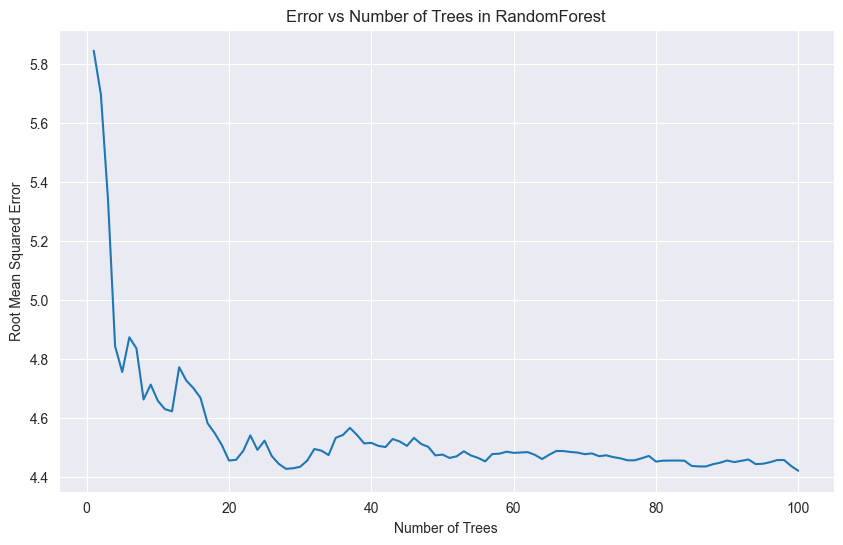

In [94]:
# List to hold the number of estimators and errors
n_estimators = []
errors = []

# Iterating over multiple numbers of trees (1 to 100)
for n in range(1, 101):
    rf = RandomForestRegressor(n_estimators=n, random_state=1008, min_samples_split=2, min_samples_leaf=1, bootstrap=True)  # using hyperparameters from best model
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, preds))  # RMSE
    n_estimators.append(n)
    errors.append(error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, errors)
plt.xlabel('Number of Trees')
plt.ylabel('Root Mean Squared Error')
plt.title('Error vs Number of Trees in RandomForest')
plt.show()


<font size="5" color="rgb(200,200,0)">The error is almost constant after 20 trees. We can select n_estimators = 20 for computational efficiency.

# Model Deployment Using Joblib and Dash

In [135]:
# Save the Model as Pickle File
dump(rf_best_model,'Concrete Strength Predictive Model.pkl')

['Concrete Strength Predictive Model.pkl']

In [158]:
# Save the Scaler as a Pickle File
dump(scaler,'scaler.pkl')

['scaler.pkl']

In [136]:
# Load the Model
model = load('Concrete Strength Predictive Model.pkl')

In [159]:
# Load the Scaler
scaler = load('scaler.pkl')

In [172]:
app = dash.Dash()
app.layout = html.Div([
    html.H1('Concrete Compressive Strength Prediction'),
    html.P([
        'Concrete is the most common material used in construction of structures. Concrete is made from several ingredients including ',
        html.Span('Cement, Water, Fly Ash, Slag, Superplasticizer, Coarse Aggregate, Fine Aggregate and Concrete Curing Period. ',style = {'color':'red'}),'Different proportions of these ingredients results in different strength of the concrete. This predictive model allows to predict concrete compressive strength based on different proportion of ingredients and curing period.'
        ]),
    html.Div([
        html.Label('Enter Quantity of Cement (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'cement',value='',type = 'number',min = concrete['cement'].min(),max = concrete['cement'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Quantity of Slag (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'slag',value='',type = 'number',min = concrete['slag'].min(),max = concrete['slag'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Quantity of Fly Ash (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'fly-ash',value='',type = 'number',min = concrete['fly_ash'].min(),max = concrete['fly_ash'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Quantity of Water (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'water',value='',type = 'number',min = concrete['water'].min(),max = concrete['water'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Quantity of Superplasticizer (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'sp',value='',type = 'number',min = concrete['superplasticizer'].min(),max = concrete['superplasticizer'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Quantity of Coarse Aggregate (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'coarse-agg',value='',type = 'number',min = concrete['coarse_aggregate'].min(),max = concrete['coarse_aggregate'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Quantity of Fine Aggregate (kg)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'fine-agg',value='',type = 'number',min = concrete['fine_aggregate'].min(),max = concrete['fine_aggregate'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Label('Enter Curing Period (days)')],style = {'color':'blue','display':'block','margin-bottom':'5px'}),
    html.Div([
        dcc.Input(id = 'age',value='',type = 'number',min = concrete['age'].min(),max = concrete['age'].max())],style = {'color':'blue','display':'block','margin-bottom':'20px'}),
    html.Div([
        html.Button('Predict',id='predict-button')],style={'margin-bottom':'10px'}),
    html.Div(id = 'prediction',style={'fontSize':24,'color':'blue'}),
    html.H2('Model Limitations'),
    html.P('1. The model does not take into account different environmental conditions in which concrete can be prepared.',style={'margin-bottom':'5px'}),
    html.P("2. The quality of the materials can be different based on it's source which can affect the strength of the concrete")
])

@app.callback(Output(component_id='prediction',component_property='children'),
              [Input(component_id='predict-button',component_property='n_clicks')],
              [State(component_id='cement',component_property='value'),
               State(component_id='slag',component_property='value'),
               State(component_id='fly-ash',component_property='value'),
               State(component_id='water',component_property='value'),
               State(component_id='sp',component_property='value'),
               State(component_id='coarse-agg',component_property='value'),
               State(component_id='fine-agg',component_property='value'),
               State(component_id='age',component_property='value')])
def predict_concrete_strength(n_clicks,cement,slag,fly_ash,water,sp,coarse_agg,fine_agg,age):
    if n_clicks:
        feature_vector = [[float(cement),float(slag),float(fly_ash),float(water),float(sp),float(coarse_agg),float(fine_agg),float(age)]] # Prepare the feature vector for prediction
        feature_vector_scaled = scaler.transform(feature_vector)
        prediction = model.predict(feature_vector_scaled)[0].round(2)
        result =  f'The Compressive Strength of Concrete Mix is Predicted to be {prediction} MPa After {float(age)} Days'
        return html.Div(result,style={'fontSize':24,'color':'green'})

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [27/Jun/2023 16:43:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Jun/2023 16:43:37] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [27/Jun/2023 16:43:37] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [27/Jun/2023 16:43:37] "GET /_favicon.ico?v=2.10.2 HTTP/1.1" 200 -
127.0.0.1 - - [27/Jun/2023 16:43:37] "POST /_dash-update-component HTTP/1.1" 200 -
C:\Users\SGangwal\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

127.0.0.1 - - [27/Jun/2023 16:44:41] "POST /_dash-update-component HTTP/1.1" 200 -
C:\Users\SGangwal\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

127.0.0.1 - - [27/Jun/2023 16:45:49] "POST /_dash-update-component HTTP/1.1" 200 -
